In [ ]:
import os
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
try:
    os.chdir("../../ML_activity")
except FileNotFoundError:
    print("""
        FileNotFoundError - Puede que el directorio no exista o no estas ubicad@ en la ruta especificada.
        """)
os.chdir("..")
print(os.getcwd())

c:\Users\natym\Desktop


In [3]:
ml_data = pd.read_csv('ML_activity/data/MLA_100k_cleaned.csv')

### **_Model Training_**

#### _Import libraries_

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
categorical_features = ['listing_type_id', 'buying_mode', 'status', 'shipping_mode']
boolean_features = ['automatic_relist', 'local_pick_up', 'free_shipping']
numeric_features = ['price', 'sold_quantity', 'available_quantity']
target = 'condition'

In [6]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(ml_data[categorical_features]))
df_encoded.columns = encoder.get_feature_names_out(categorical_features)
df_encoded.index = ml_data.index
df = pd.concat([ml_data.drop(categorical_features, axis=1), df_encoded], axis=1)

In [7]:
df_booleans = df[boolean_features].astype(int)

In [8]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=numeric_features, index=df.index)

In [9]:
df_ml = pd.concat([df[target], df_encoded, df_booleans, df_scaled], axis=1)
df_ml.head()

,condition,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_auction,buying_mode_buy_it_now,...,shipping_mode_custom,shipping_mode_me1,shipping_mode_me2,shipping_mode_not_specified,automatic_relist,local_pick_up,free_shipping,price,sold_quantity,available_quantity
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,1,0,-0.006082,-0.056156,-0.080423
1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,1,0,-0.005784,-0.056156,-0.080423
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,1,0,-0.006084,-0.056156,-0.080423
3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,1,0,-0.006024,-0.056156,-0.080423
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,1,0,-0.006088,-0.056156,-0.080423


#### _Splitting Data_

In [10]:
X = df_ml
y = df_ml['condition']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

#### _Models_

The models that are going to be used, due to their wide use for classification are:
- Logistic Regression
- XGBoost
- KNN
- Decision Tree

And the metrics used are:
- Accuracy
- Precision
- Recall
- F1 score

In [11]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}


In [12]:
X = df_ml.drop(columns=['condition'])
y = df_ml['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
metrics = []

for name, model in models.items():
    print(f"\nTraining model: {name}")

    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)

    acc = accuracy_score(y_train, y_pred_cv)
    prec = precision_score(y_train, y_pred_cv, average='weighted')
    rec = recall_score(y_train, y_pred_cv, average='weighted')
    f1 = f1_score(y_train, y_pred_cv, average='weighted')
    
    metrics.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })


Training model: Logistic Regression

Training model: XGBoost


c:\Users\natym\Desktop\ML_activity\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:08:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\natym\Desktop\ML_activity\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:08:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\natym\Desktop\ML_activity\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:08:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\natym\Desktop\ML_activity\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:08:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Paramet


Training model: KNN

Training model: Decision Tree



Evaluation in the test set:

=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.8852    0.5189    0.6543      9283
           1     0.6932    0.9417    0.7986     10717

    accuracy                         0.7454     20000
   macro avg     0.7892    0.7303    0.7264     20000
weighted avg     0.7823    0.7454    0.7316     20000

Accuracy: 0.7454


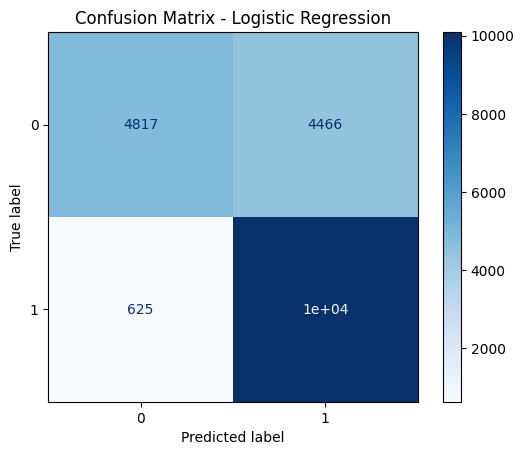


=== XGBoost ===


c:\Users\natym\Desktop\ML_activity\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:08:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0     0.8111    0.8356    0.8232      9283
           1     0.8538    0.8315    0.8425     10717

    accuracy                         0.8334     20000
   macro avg     0.8325    0.8335    0.8328     20000
weighted avg     0.8340    0.8334    0.8335     20000

Accuracy: 0.8334


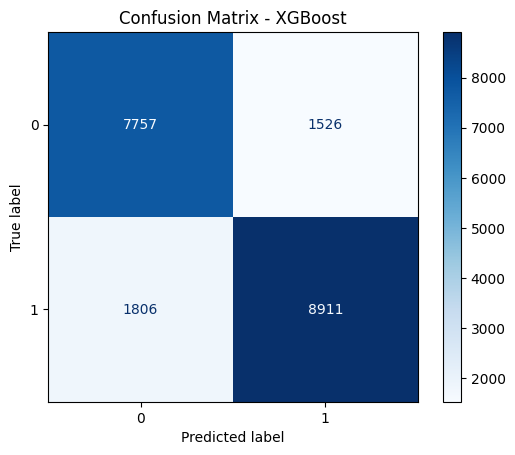


=== KNN ===
              precision    recall  f1-score   support

           0     0.7941    0.8228    0.8082      9283
           1     0.8415    0.8152    0.8281     10717

    accuracy                         0.8187     20000
   macro avg     0.8178    0.8190    0.8182     20000
weighted avg     0.8195    0.8187    0.8189     20000

Accuracy: 0.8187


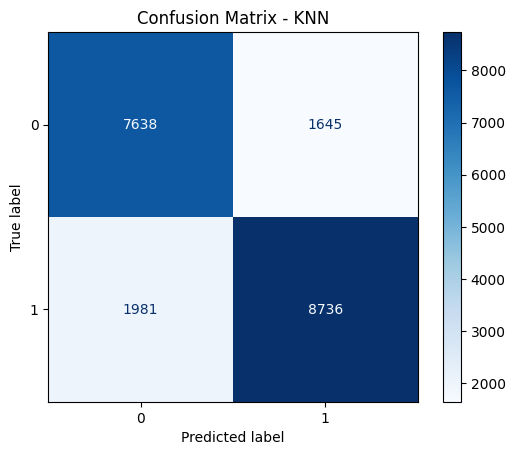


=== Decision Tree ===
              precision    recall  f1-score   support

           0     0.7596    0.8842    0.8172      9283
           1     0.8831    0.7576    0.8155     10717

    accuracy                         0.8164     20000
   macro avg     0.8213    0.8209    0.8163     20000
weighted avg     0.8258    0.8164    0.8163     20000

Accuracy: 0.8164


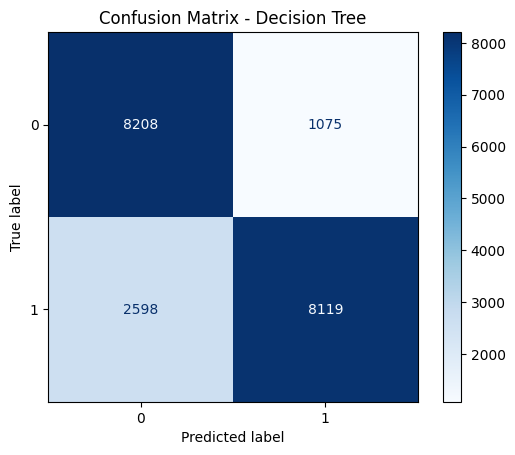

In [14]:
print("\nEvaluation in the test set:")

for name, model in models.items():
    print(f"\n=== {name} ===")
    
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    
    print(classification_report(y_test, y_pred_test, digits=4))
    
    acc = accuracy_score(y_test, y_pred_test)
    print(f"Accuracy: {acc:.4f}")

    cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [15]:
results_df = pd.DataFrame(metrics)
print("\nComparative results:")
print(results_df.sort_values(by='F1 Score', ascending=False))


Comparative results:
                 Model  Accuracy  Precision    Recall  F1 Score
1              XGBoost  0.834688   0.835464  0.834688  0.834850
2                  KNN  0.819450   0.820705  0.819450  0.819667
3        Decision Tree  0.816150   0.824384  0.816150  0.816225
0  Logistic Regression  0.741175   0.778831  0.741175  0.726252


**_Conclusions_**

- XGBoost achieved the highest Accuracy (83.47%), indicating that it had the best overall prediction performance on unseen data. This suggests it is the most suitable model when the objective is to maximize correct classifications regardless of class.

- KNN and Decision Tree followed closely, with accuracies of 81.95% and 81.62%, respectively. These models might be valid alternatives in contexts where interpretability (Decision Tree) or instance-based logic (KNN) are prioritized.

- Logistic Regression showed significantly lower accuracy (74.12%), indicating that a linear decision boundary is not sufficient to model the underlying patterns in this dataset.